# Water Potability Pipeline

This notebook will walk through the steps of pre-processing a _water potability_ dataset from Kaggle.com.  The dataset will be fed into a ML model to predict if a given water sample is potable or not.

### Imports
Imports all modules needed for this data pipeline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Assessing Raw Data

This part will briefly assess the raw data that will be fed into the data pipeline.  This will identify some apsects to target during the _pre-processing_ portion of the data pipeline.

In [4]:
file = "data/water_potability.csv"
df = pd.read_csv(file)
row_count = len(df['ph'])
rows = list()
for col in df.columns:
    NaN_count = len(df[df[col].isnull()])
    NaN_perc = round(NaN_count / row_count, 2) * 100
    maximum = round(max(df[~df[col].isnull() & ~df[col].isin(['nan'])][col]), 2)
    minimum = round(min(df[~df[col].isnull() & ~df[col].isin(['nan'])][col]), 2)
    if col == 'ph':
        print(maximum)
        print(minimum)
    rows.append([col, NaN_count, NaN_perc, maximum, minimum])

summary = pd.DataFrame(data=rows, columns=["Column Name", "NaN Counts", "NaN %", "Max", "Min"])
summary

14.0
0.0


,Column Name,NaN Counts,NaN %,Max,Min
0,ph,491,15.0,14.00,0.00
1,Hardness,0,0.0,323.12,47.43
2,Solids,0,0.0,61227.20,320.94
3,Chloramines,0,0.0,13.13,0.35
4,Sulfate,781,24.0,481.03,129.00
5,Conductivity,0,0.0,753.34,181.48
6,Organic_carbon,0,0.0,28.30,2.20
7,Trihalomethanes,162,5.0,124.00,0.74
8,Turbidity,0,0.0,6.74,1.45
9,Potability,0,0.0,1.00,0.00


## Replacing NaN/Missing Values

To resolve values that have missing or NaN values, the _average_ for the column's values will be used instead.

In [5]:
df.fillna(df.mean(), inplace=True)
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Plotting Factors of Water Potability

Samples will be plotted based on two factors from the dataset to determine if there is a correlation between the factors and the potability of the water.  These plots will be scatter plots and the results, ideally, would be two distinguishable clusters: one for samples that are potable and the other for samples that are not.

#### Hardness & Turbidity

These two properties are often discussed together, though it should be noted that they are different measurable properties of water.  The *hardness* of water indicates the quantity of dissolved minerals present in the sample.  The higher the level of hardness, the greater amount of minerals dissolved in the water sample.  Hard water is associated with scaling due to the minerals falling out of solution and building-up alongside the edges of the surrounding container.  *Turbidity* is the amount of light scattered by suspended particulates within the water sample, in other words, the clarity of the water.  The greater the turbidity, the more light is scattered, indicating that there is a larger number of particulates suspended in solution.  A more turbid sample will appear "cloudy" and opaque due to this light scattering.

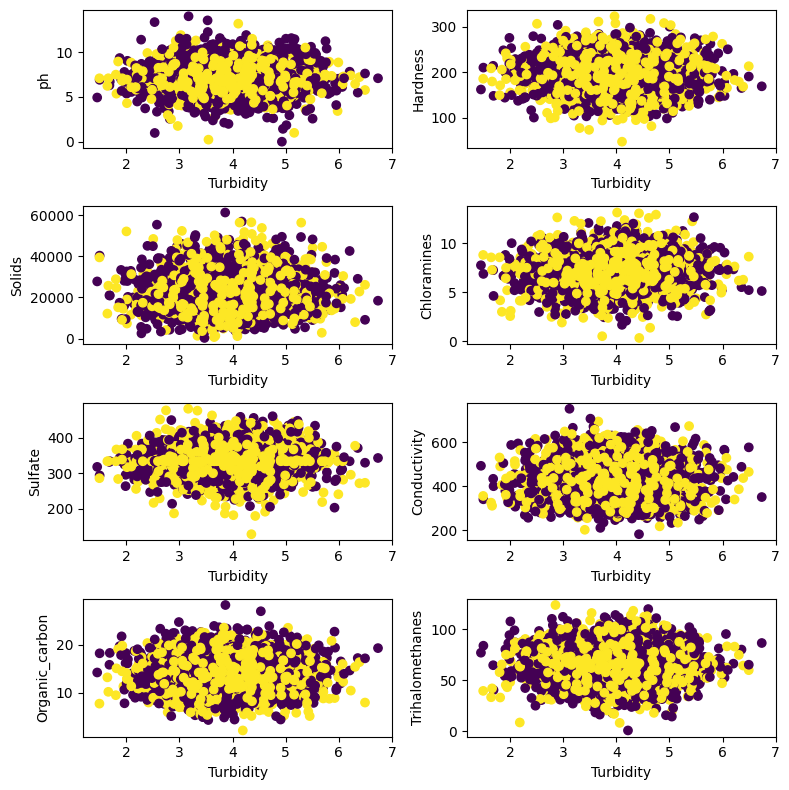

In [31]:
import math
# (sulfate, ph)
focus_column = "Turbidity"
y_columns = [x for x in df.columns if (x != focus_column and x != "Potability")]

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

for idx, y_column in enumerate(y_columns):
    row_pos = math.floor(idx / 2)
    col_pos = idx % 2
    x = df[focus_column]
    y = df[y_column]
    
    ax[row_pos, col_pos].scatter(x, y, c=df["Potability"])
    ax[row_pos, col_pos].set_xlabel(focus_column)
    ax[row_pos, col_pos].set_ylabel(y_column)
plt.tight_layout()
plt.show()